<a href="https://colab.research.google.com/github/snickerphudle/FutureMakers2021/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#imports the various libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#imports keras libraries for building a neural network
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#read the csv file and store it in the variable df
df = pd.read_csv('housepricedata.csv')

Below is all the data that is stored in the csv file. There are 10 input features.



*   Lot Area (square feet)
*   Overall Quality [1 - 10]
*   Overall Condition [1 - 10]
*   Total Basement Area (in sq ft)
*   Number of Full Bathrooms
*   Number of Half Bathrooms
*   Number of Bedrooms above ground
*   Total Number of Rooms above ground
*   Number of Fireplaces
*   Garage Area (in sq ft)

The label we are trying to predict is whether or not the price is above median or not. 1 = yes and 0 = no

In [9]:
#this line prints all the data into the notebook
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [10]:
#turns the dataframe into an array
dataset = df.values

In [11]:
#shows what's inside the array
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

# 2D Slicing in Python

array[a:b, c:d]

*   a = which row to start on
*   b = which row to end on
*   c = which column to start on
*   d = which coulmn to end on


In [12]:
#[a:b, c:d]
#a:b = all rows are used, no rows are skipped out
#c:d = all columns except the last one is used (the label column)
features = dataset[ : , 0:10]

#a:b = all rows used
#c:d = column 10 to the rest used (last column)
labels = dataset[:,10]

In [13]:
#min-max scaler = scales all the data so the features lie between 0 and 1
#some features have range [0,1] or [0,10], important to rescale
#creates min max scaler object
min_max_scaler = preprocessing.MinMaxScaler()

#stores the newly scaled feature data array in feature_scale
features_scaled = min_max_scaler.fit_transform(features)

In [14]:
features_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
#splitting data into train and validation/test
#x_train and x_val_and_test = 70% features train, 30% features test
#y_train and y_val_and_test = 70% labels train, 30% label test
#a,b,c,d = train_test_split(features, labels, test_size)
#percentage of the two feature and label arrays will go into b and d
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(features_scaled, labels, test_size = 0.3)

In [16]:
#splits the x_val_and_test + y_val_and_test arrays into 2 and puts them evenly in
#respective x test and validate arrays
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size = 0.5)

Data Allocation

1. x_train = 70% (10 features)
2. x_val = 15% (10 features)
3. x_test = 15% (10 features)

4. y_train = 70% (1 label)
5. y_val = 15% (1 label)
6. y_test = 15% (1 label)


In [17]:
#prints the shape of the arrays to give a good idea of what each array holds
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# DATA PREPROCESSING DONE
Summary:

1. imported all the packages
2. imported the data file
3. turned the data into an array
4. stored the feature/label data into x and y arrays
5. normalized the feature data using min_max_scaler.fit_transform(x)
6. split the data into training, validation, and test

# BUILDING THE NEURAL NETWORK

In [18]:
#model stored in "model" variable
#layer 1 = 32 layers, input_shape = 10 inputs
#no need to create input layer, creating the hidden layer initiatlizes the input layer

model = Sequential([
    Dense(32, activation = 'relu', input_shape = (10,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [19]:
#sgd = stochatic gradient descent, backpropogation on every iteration
#binary_crossentropy = loss function used for binary classification problems
#metrics = optional field, provides accuracy of the model

model.compile(optimizer = 'sgd',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [20]:
#fit fucntion = trains the model based on the data, x_train and y_train
hist = model.fit(x_train, y_train, 
          batch_size = 32, epochs = 100,
          validation_data = (x_val, y_val))

Epoch 1/100
32/32 [==============================] - 14s 17ms/step - loss: 0.6943 - accuracy: 0.4726 - val_loss: 0.6895 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4784 - val_loss: 0.6873 - val_accuracy: 0.5114
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.4958 - val_loss: 0.6851 - val_accuracy: 0.5753
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6728 - val_loss: 0.6827 - val_accuracy: 0.6941
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6858 - val_loss: 0.6802 - val_accuracy: 0.7626
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.7270 - val_loss: 0.6780 - val_accuracy: 0.7626
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.7229 - val_loss: 0.6757 - val_accuracy: 0.7443
Epoch 8/100

In [21]:
#runs the model on the test set
#[1] prints the accuracy, since the model will print the loss and accuracy otherwise
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8721


0.8721461296081543

# VISUALIZING THE MODEL

In [22]:
import matplotlib.pyplot as plt


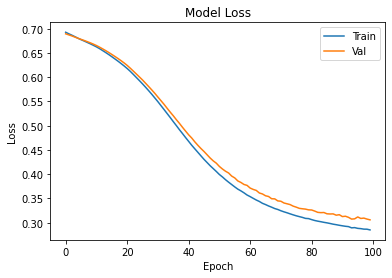

In [26]:
#plot the loss and val_loss, actually visualizing the data
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

#labels
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')

#show the plt
plt.show()

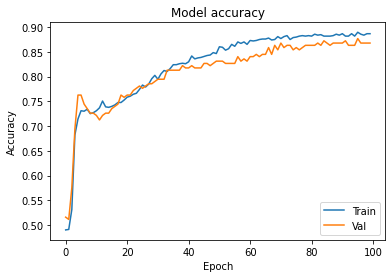

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()